# Churn for Bank Customers

## 0- Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1- Bussines Understanding

Como sabemos, es mucho más caro iniciar sesión en un nuevo cliente que mantener uno existente.  

Es ventajoso para los bancos saber qué lleva a un cliente a la decisión de dejar la empresa.  

La prevención de abandonos permite a las empresas desarrollar programas de fidelización y campañas de retención para mantener tantos clientes como sea posible

## 2- Data Understanding  

**dataset:** https://www.kaggle.com/mathchi/churn-for-bank-customers

**Content**  
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.

In [148]:
df = pd.read_csv('churn.csv')

In [149]:
df.drop('RowNumber', axis = 1, inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.dtypes.value_counts()

int64      8
object     3
float64    2
dtype: int64

In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3 - Exploratory Data Analysis- EDA

### Categorical Cols

In [7]:
object_cols = df.select_dtypes('object').columns.tolist()
object_cols

['Surname', 'Geography', 'Gender']

In [8]:
for i in object_cols:
    print('Variable {}, Registros: {}'.format(i, df[i].nunique()))

Variable Surname, Registros: 2932
Variable Geography, Registros: 3
Variable Gender, Registros: 2


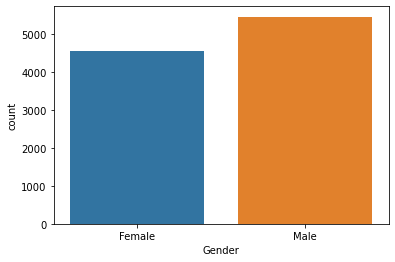

In [9]:
sns.countplot(data = df, x = 'Gender');

In [10]:
df['Gender'].value_counts(normalize= True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

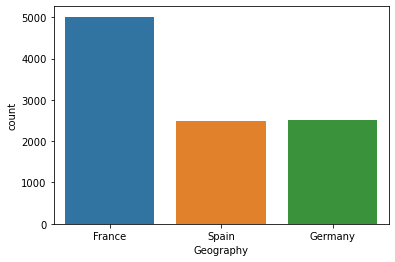

In [25]:
sns.countplot(data = df, x = 'Geography');

In [11]:
df['Geography'].value_counts(normalize= True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

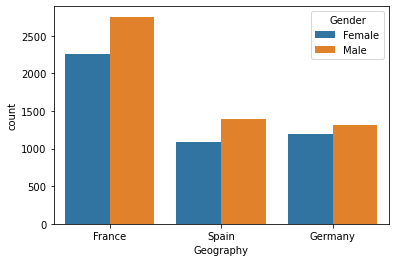

In [12]:
sns.countplot(data = df, x = 'Geography', hue='Gender');

In [13]:
geo_gender = df.groupby(['Geography', 'Gender'], as_index=True).size().reset_index()
geo_gender.columns=['Geography', 'Gender', 'count']
geo_gender.sort_values(by= 'count', ascending=False)

,Geography,Gender,count
1,France,Male,2753
0,France,Female,2261
5,Spain,Male,1388
3,Germany,Male,1316
2,Germany,Female,1193
4,Spain,Female,1089


**Comentario:**  
- el 54.57% de los registros presentados en la variable Gender está compuestos por Hombres(Male)
- Francia compone el mayor porcentaje de nuestros data con el 50.14%

###  Target

In [14]:
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

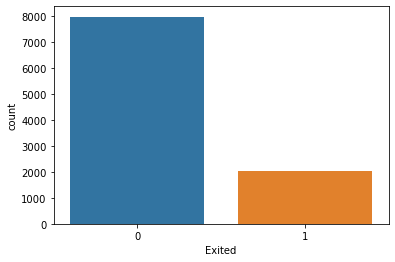

In [15]:
sns.countplot(data = df, x = 'Exited');

**Comentario:**  
- 0= 79.63% 1= 20.73%
- Los datos de salidas están desbalanceados por lo que se debe de aplicar métodos para el balanceo de las clases

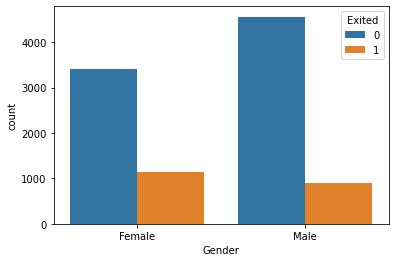

In [16]:
sns.countplot(data = df, x= 'Gender', hue = 'Exited');

In [17]:
salida = df.groupby(['Gender','Exited'], as_index=False).size()
salida

,Gender,Exited,size
0,Female,0,3404
1,Female,1,1139
2,Male,0,4559
3,Male,1,898


In [18]:
salida_male = salida.loc[3:, 'size'].tolist()/df['Gender'].value_counts()[0]
salida_female = salida.loc[1:1, 'size'].tolist()/df['Gender'].value_counts()[1]

In [19]:
print('Clientes Salientes expresados en %: Female{}, Male{}'.format(salida_female, salida_male))

Clientes Salientes expresados en %: Female[0.25071539], Male[0.16455928]


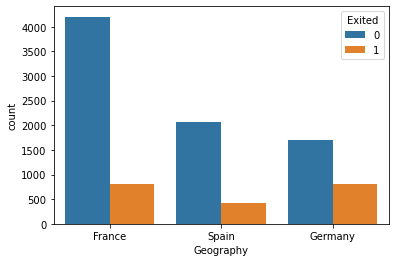

In [20]:
sns.countplot(data = df, x = 'Geography', hue='Exited');

In [21]:
df.groupby(['Geography','Exited'], as_index=False).size()

,Geography,Exited,size
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


In [22]:
b =df.groupby(['Geography', 'Gender', 'Exited'], as_index=False).size()
b

,Geography,Gender,Exited,size
0,France,Female,0,1801
1,France,Female,1,460
2,France,Male,0,2403
3,France,Male,1,350
4,Germany,Female,0,745
5,Germany,Female,1,448
6,Germany,Male,0,950
7,Germany,Male,1,366
8,Spain,Female,0,858
9,Spain,Female,1,231


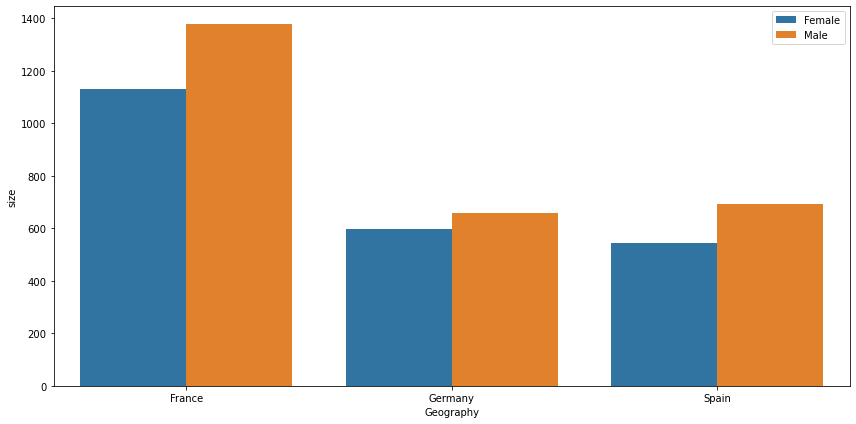

In [25]:
plt.figure(figsize=(12, 6), tight_layout=True)
sns.barplot(x = 'Geography', y = 'size', data = b, hue = 'Gender', ci=None)
plt.legend(loc = 'upper right')
plt.show()

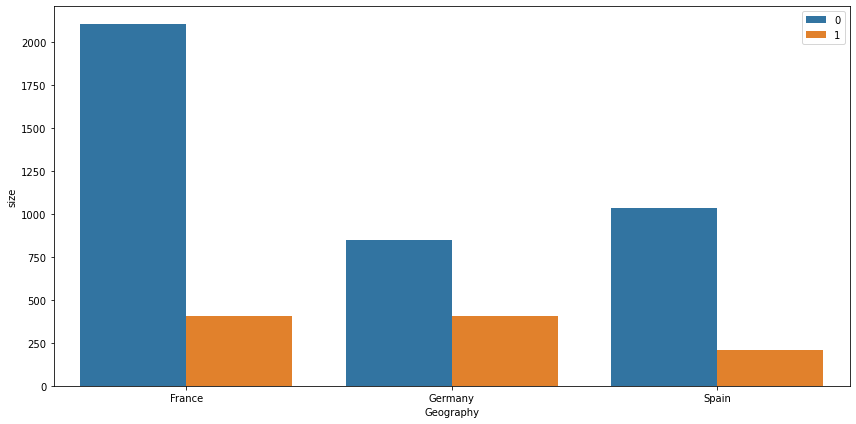

In [26]:
plt.figure(figsize=(12, 6), tight_layout=True)
sns.barplot(x = 'Geography', y = 'size', data = b, hue = 'Exited', ci=None)
plt.legend(loc = 'upper right')
plt.show()

**Comentario:**  
- El 25% de nuestros clientes salientes son mujeres
- El páis con mayor salida de los clientes es Germany

In [27]:
#stats
df[object_cols].describe().T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


### Numerical values

In [28]:
num_cols = df.select_dtypes(np.number).columns.tolist()
num_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [29]:
cols_view = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

#### Dsitribuition

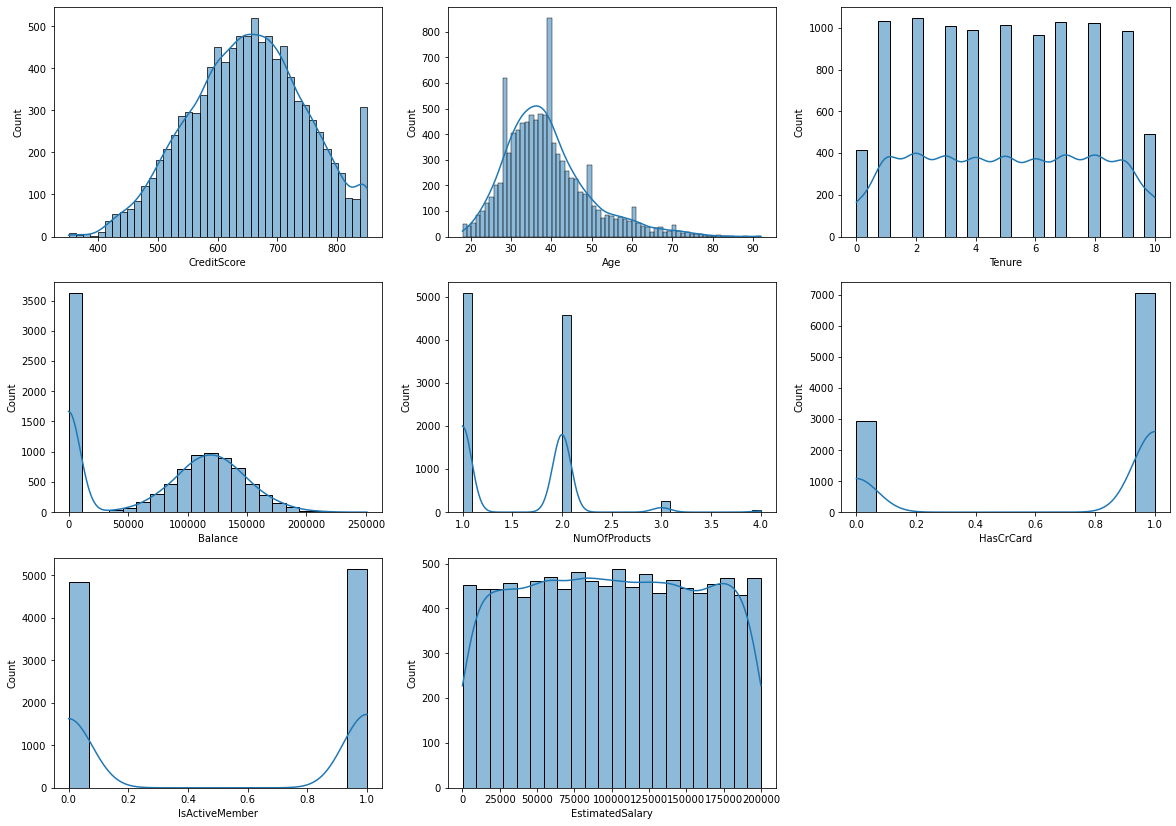

In [30]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical in cols_view:
    ax = plt.subplot(12,3, plotnumber)
    sns.histplot(df[numerical], kde=True)
    plt.xlabel(numerical)
 
    
    plotnumber = plotnumber+1
plt.show()

In [31]:
df[cols_view].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


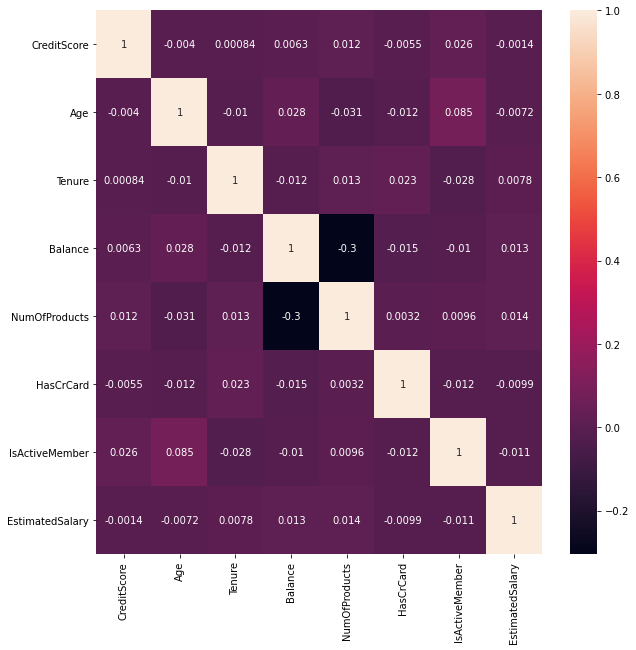

In [32]:
plt.figure(figsize=(10,10), facecolor='white')
sns.heatmap(df[cols_view].corr(), annot=True)
plt.show()

### Outliers

In [33]:
q1 = df[cols_view].quantile(.25)
q3 = df[cols_view].quantile(.75)
IQR = q3-q1
IQR

CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
dtype: float64

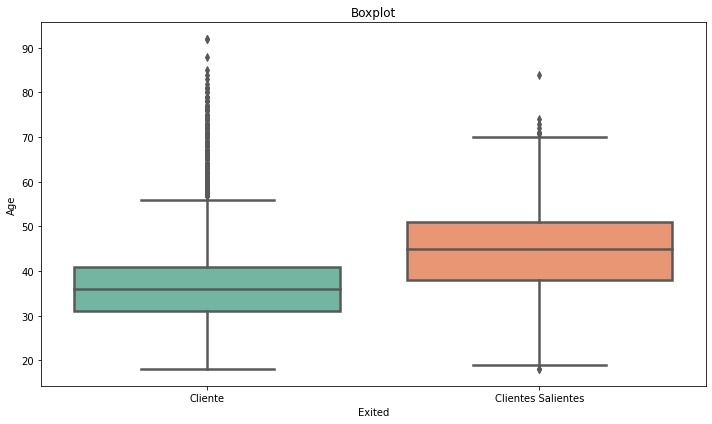

In [34]:
plt.figure(figsize=(10,6), tight_layout=True)
ax =sns.boxplot(data = df, x = 'Exited' , y = 'Age', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='Exited', ylabel='Age')
plt.xticks([0,1], ['Cliente', 'Clientes Salientes'])
plt.show()

In [35]:
df['Age'].value_counts().sort_index()

18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: Age, Length: 70, dtype: int64

In [36]:
df[df['Age']>88]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


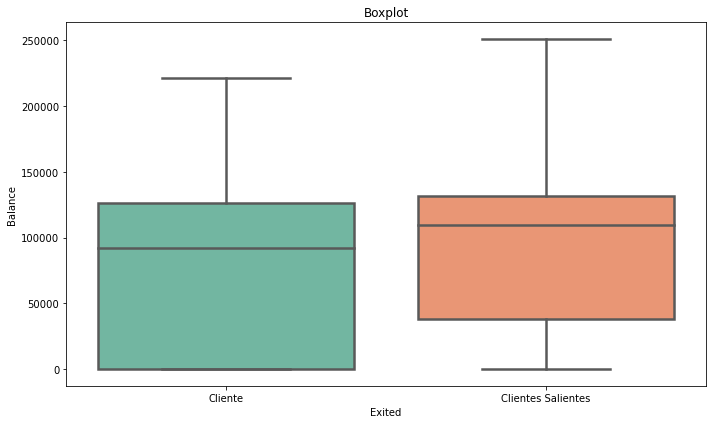

In [37]:
plt.figure(figsize=(10,6), tight_layout=True)
ax =sns.boxplot(data = df, x = 'Exited' , y = 'Balance', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='Exited', ylabel='Balance')
plt.xticks([0,1], ['Cliente', 'Clientes Salientes'])
plt.show()

**Comentarios:**  
- El dataset presenta outliers 
- tenemos dos clientes con 92 años poseen saldos

No vamos a eliminar los outliers ya que todavía son clientes nuestros y presentan Balance

### Features Analytics


### Balance

In [39]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [40]:
#Clientes con balance en 0
len(df[(df['Balance']==0) & (df['Exited']==0)])

3117

In [41]:
# Ex_Clientes con balances en 0
len(df[(df['Balance']==0) & (df['Exited']==1)])

500

In [42]:
# Ex-Clinetes que abandonaron con un alto Balance
len(df[(df['Balance']>127644.24) & (df['Exited']==1)])

592

**Comentario**: 
- La cantidad de Nuestos clientes con balance 0 es de 3,117.
- 500 Personas que dejaron de ser nuestros clientes con balance en 0.
- 592 Personas que dejaron de ser nuestros clientes con balance Altos.

### CreditScore

In [43]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [48]:
# Clientes por encima de la media
len(df[(df['CreditScore']>718) & (df['Exited']==1)])

500

In [50]:
credito = df[(df['CreditScore']>718) & (df['Exited']==1)]
credito.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
43,15755196,Lavine,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
46,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
70,15703793,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
81,15663706,Leonard,777,France,Female,32,2,0.00,1,1,0,136458.19,1
86,15762418,Gant,750,Spain,Male,22,3,121681.82,1,1,0,128643.35,1


In [53]:
len(credito[(credito['IsActiveMember']==1) & (credito['Balance']>0)])

137

In [71]:
p1 = credito.groupby(['IsActiveMember'], as_index=False)['Balance'].count()
p1

,IsActiveMember,Balance
0,0,320
1,1,180


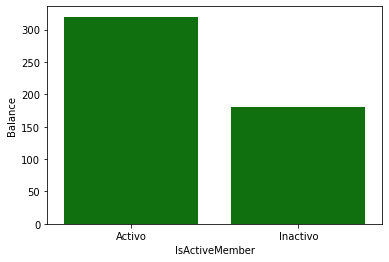

In [88]:
sns.barplot(x = 'IsActiveMember', y = 'Balance', data = p1, color='green')
plt.xticks([0,1], ['Activo', 'Inactivo'])
plt.show()

In [56]:
len(credito[(credito['HasCrCard']==1) & (credito['Balance']>0)])

257

In [61]:
len(credito[(credito['IsActiveMember']==1) & (credito['Balance']>0) & (credito['HasCrCard']==1)])

82

In [80]:
cred2 =credito[(credito['IsActiveMember']==1) & (credito['Balance']>0) & (credito['HasCrCard']==1)]

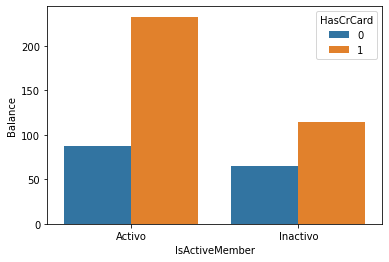

In [89]:
sns.barplot(x = 'IsActiveMember', y = 'Balance', data = p2, hue= 'HasCrCard')
plt.xticks([0,1], ['Activo', 'Inactivo'])
plt.show()

In [91]:
p2 =credito.groupby(['IsActiveMember', 'HasCrCard'], as_index=False)['Balance'].count()
p2

,IsActiveMember,HasCrCard,Balance
0,0,0,87
1,0,1,233
2,1,0,65
3,1,1,115


**Comentario**  
- Hay 500 personas que abandonaron con El credito por encima de la media
- 137 Abandono de clientes y Tienen Balance en sus cuentas con el estatus de  IsActiveMember.
- 257 Abandono de clientes con Balance y tienen Tarjeta
- De 115 personsa con estatus activo y con tarjeta, tenemos: 
    - 82 Clientes que Abandonaron con Balance por encima de 0.


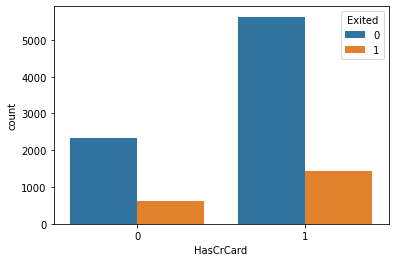

In [65]:
sns.countplot(x= 'HasCrCard', hue= 'Exited', data = df);

In [64]:
df.groupby(['HasCrCard', "Exited"], as_index=False).size()

,HasCrCard,Exited,size
0,0,0,2332
1,0,1,613
2,1,0,5631
3,1,1,1424


**Comentario** 
- 613 Clientes que han Abandonado que no tenían tarjetas
- 1,424 clientes que presentaron abandono que tenían tarjetas

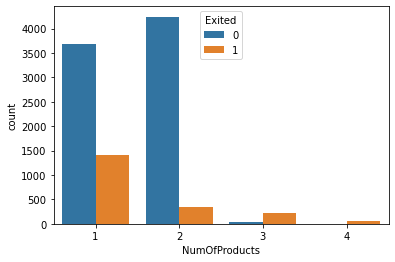

In [93]:
sns.countplot(x= 'NumOfProducts', hue= 'Exited', data = df);

In [92]:
df.groupby(['NumOfProducts', "Exited"], as_index=False).size()

,NumOfProducts,Exited,size
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


**Clientes que Dejaron de ser nuestros por Cantidad de Productos:**
- Con 1 = 1,409
- Con 2 = 348
- Con 3 = 220
- Con 4 = 60

### Tenure

In [112]:
p4 = df['Tenure'].value_counts().reset_index()
p4.columns = ['Tenure', 'cantidad']
p4.sort_values(by= 'Tenure', inplace=True)
p4

,Tenure,cantidad
10,0,413
1,1,1035
0,2,1048
5,3,1009
6,4,989
4,5,1012
8,6,967
2,7,1028
3,8,1025
7,9,984


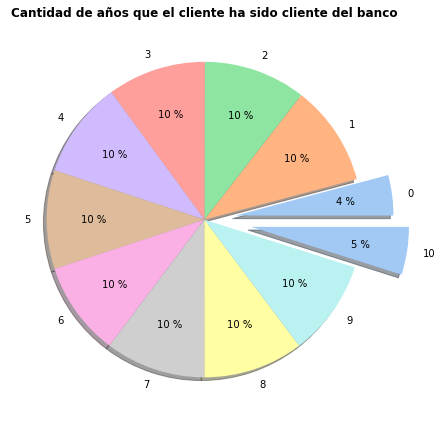

In [119]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3]
plt.pie(p4['cantidad'], labels=p4['Tenure'],
       autopct='%.0f %%',  pctdistance=.7,
          colors=colors, shadow=True, explode = explode_list)
plt.title('Cantidad de años que el cliente ha sido cliente del banco', weight='bold')
plt.show()

In [103]:
p3 = df.groupby('Exited', as_index=False)['Tenure'].count()
p3

,Exited,Tenure
0,0,7963
1,1,2037


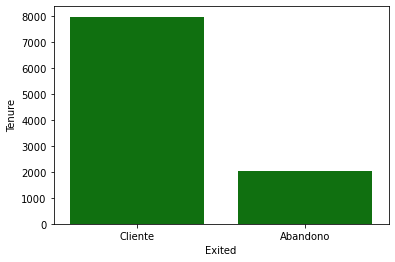

In [122]:
sns.barplot(x = 'Exited', y = "Tenure", data = p3, color='green')
plt.xticks([0, 1], ['Cliente', 'Abandono'])
plt.show()

In [125]:
tiempo_clientes  = df.groupby(['Exited', 'Tenure'], as_index=False).size()
tiempo_clientes.head()

,Exited,Tenure,size
0,0,0,318
1,0,1,803
2,0,2,847
3,0,3,796
4,0,4,786


In [127]:
p5 = tiempo_clientes[tiempo_clientes['Exited']==1]
p5

,Exited,Tenure,size
11,1,0,95
12,1,1,232
13,1,2,201
14,1,3,213
15,1,4,203
16,1,5,209
17,1,6,196
18,1,7,177
19,1,8,197
20,1,9,213


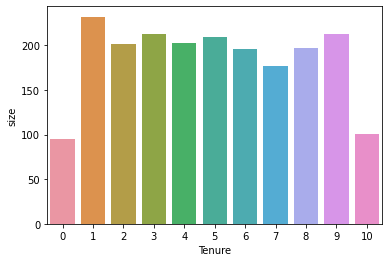

In [129]:
sns.barplot(x = 'Tenure', y = "size", data = p5)
plt.show()

**Cantidad de años que el cliente ha sido cliente del banco**  
- Nuestros clientes 10 años en el banco representa el 5%
- El mayor abandono se presenta a 1, 3, 5 y 9 años.

## 4- Feature Engineering
- Drop Columns
- Convert Categorical to Numerical values

In [151]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
df.shape

(10000, 13)

### Drop Columns

In [152]:
#copia del df
data = df.copy()
data.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [153]:
data.drop(['CustomerId', 'Surname'], axis = 1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Convert to numerical
- Gender
- Geography

In [154]:
print('Gender:',data['Gender'].unique())
print('Geography:',data['Geography'].unique())

Gender: ['Female' 'Male']
Geography: ['France' 'Spain' 'Germany']


In [155]:
gender_map = {'Female': 0, 'Male': 1}
geography_map = {'France':0, 'Spain':1, 'Germany':2,}

In [156]:
data['Gender']= data['Gender'].map(gender_map)
data['Geography']= data['Geography'].map(geography_map)

In [157]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0


In [158]:
data.to_csv('data_clean.csv', index=False)